In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [223]:
data=pd.read_csv("diabetes.csv")

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [224]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [225]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [226]:
data.shape

(768, 9)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [228]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [229]:
data["Glucose"]=data["Glucose"].replace(0,np.nan)
data["BloodPressure"]=data["BloodPressure"].replace(0,np.nan)
data["SkinThickness"]=data["SkinThickness"].replace(0,np.nan)
data["Insulin"]=data["Insulin"].replace(0,np.nan)
data["BMI"]=data["BMI"].replace(0,np.nan)

In [230]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [231]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [232]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [233]:
data.fillna(data.median(), inplace=True)

In [234]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [235]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda

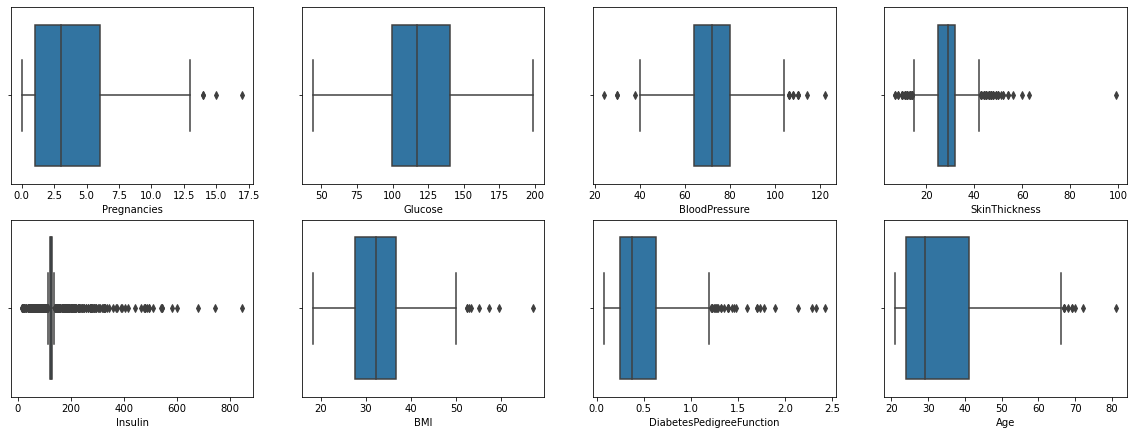

In [236]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sb.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sb.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sb.boxplot(data["SkinThickness"])


plt.subplot(4,4,5)
sb.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sb.boxplot(data["BMI"])

plt.subplot(4,4,7)
sb.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sb.boxplot(data["Age"])

plt.show()

In [237]:
data["Pregnancies"]=data["Pregnancies"].clip(lower=data["Pregnancies"].quantile(0.05),upper=data["Pregnancies"].quantile(0.95))
data["BloodPressure"]=data["BloodPressure"].clip(lower=data["BloodPressure"].quantile(0.05),upper=data["BloodPressure"].quantile(0.95))
data["SkinThickness"]=data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.07),upper=data["SkinThickness"].quantile(0.93))
data["Insulin"]=data["Insulin"].clip(lower=data["Insulin"].quantile(0.25),upper=data["Insulin"].quantile(0.75))
data["BMI"]=data["BMI"].clip(lower=data["BMI"].quantile(0.05),upper=data["BMI"].quantile(0.95))
data["DiabetesPedigreeFunction"]=data["DiabetesPedigreeFunction"].clip(lower=data["DiabetesPedigreeFunction"].quantile(0.05),upper=data["DiabetesPedigreeFunction"].quantile(0.95))
data["Age"]=data["Age"].clip(lower=data["Age"].quantile(0.05),upper=data["Age"].quantile(0.95))

C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parisan\anaconda

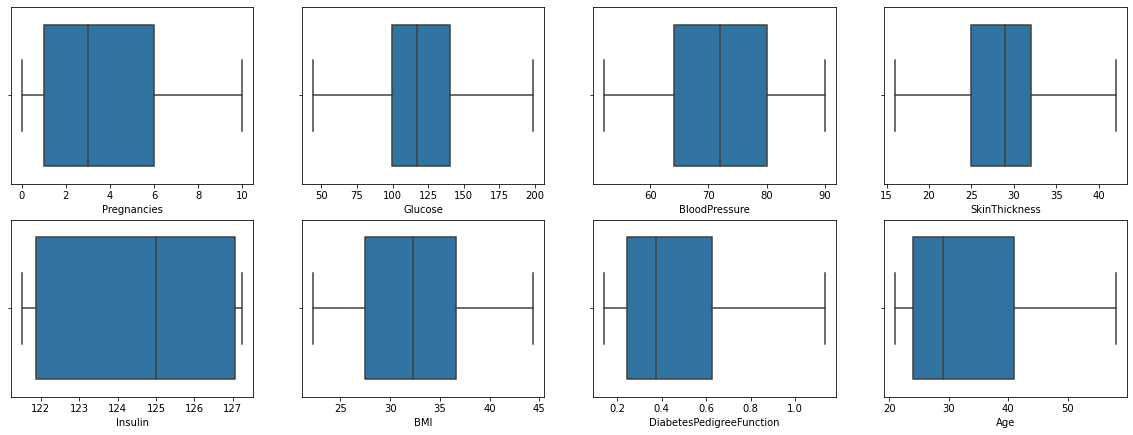

In [238]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sb.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sb.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sb.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sb.boxplot(data["SkinThickness"])


plt.subplot(4,4,5)
sb.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sb.boxplot(data["BMI"])

plt.subplot(4,4,7)
sb.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sb.boxplot(data["Age"])

plt.show()

In [239]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [240]:
x=pd.DataFrame(data,columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
y=data.Outcome.values.reshape(-1,1)

In [241]:
x

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [243]:
k=12

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\Parisan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [244]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7748917748917749


In [245]:
k=3

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\Parisan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [246]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7056277056277056


In [247]:
k=10

clf=KNeighborsClassifier(k)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\Parisan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [248]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7575757575757576


# Creat a for loop to avoid these process

In [249]:
k=20

acc=np.zeros((k))

for i in range(1, k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
acc

array([0.71861472, 0.70995671, 0.70562771, 0.72294372, 0.74458874,
       0.73160173, 0.73593074, 0.74025974, 0.74458874, 0.75757576,
       0.76190476, 0.77489177, 0.76190476, 0.76623377, 0.77056277,
       0.77489177, 0.76623377, 0.75757576, 0.76623377, 0.77489177])

In [250]:
print(np.max(acc))
print(np.min(acc))

0.7748917748917749
0.7056277056277056


In [251]:
print("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.7748917748917749


# Another Way:

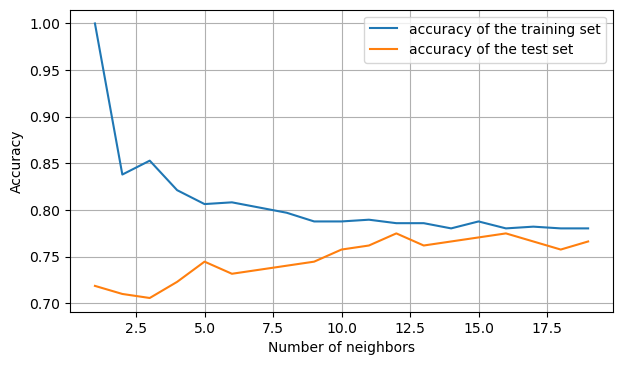

In [252]:
training_acc=[]
test_acc=[]

neighbors_setting=range(1,20)

for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
    
plt.figure(figsize=(7,4),dpi=100)

plt.plot(neighbors_setting,training_acc,label="accuracy of the training set")

plt.plot(neighbors_setting,test_acc,label="accuracy of the test set")

plt.xlabel("Number of neighbors")

plt.ylabel("Accuracy")

plt.grid()

plt.legend()

plt.show()

# Improve Model :

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
parameters={"n_neighbors":range(1,50)}

grid_knn=GridSearchCV(estimator=knn,
                      param_grid=parameters,
                      scoring="accuracy",
                      cv=5,verbose=1,
                      n_jobs=-1)

grid_knn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [255]:
grid_knn.best_params_

{'n_neighbors': 10}

In [256]:
grid_knn.predict_proba(x)
# 2 predict factor (proba, predict) proba means the probability of accuracy(x,y) y means accuracy
# for example x=0.4 y=0.6 predict =1
# x=0.9, y=0.1 predict = 0

array([[0.4, 0.6],
       [0.9, 0.1],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.5, 0.5],
       [1. , 0. ]])

In [257]:
grid_knn.predict(x)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [258]:
grid_knn.score(x, y)

0.7786458333333334

In [259]:
from sklearn.metrics import classification_report, confusion_matrix
grid_knn.classes_


array([0, 1], dtype=int64)

In [260]:
confusion_matrix(y, grid_knn.predict(x))

array([[433,  67],
       [103, 165]], dtype=int64)

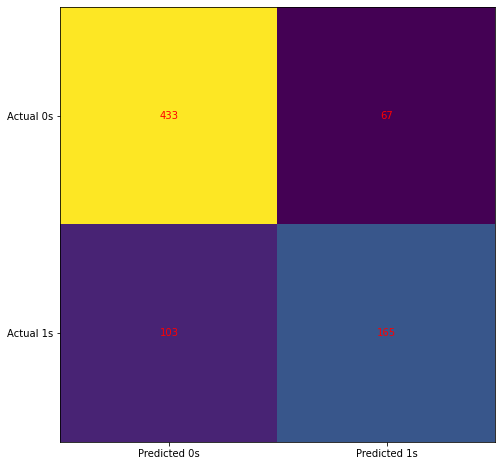

In [261]:
cm = confusion_matrix(y, grid_knn.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [262]:
print(classification_report(y, grid_knn.predict(x)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       500
           1       0.71      0.62      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



# Practice

What are these?

(C=10.0, class_weight=None, dual=False, fit_intercept=True,

intercept_scaling=1, l1_ratio=None, max_iter=100,

multi_class='warn', n_jobs=None, penalty='l2',

random_state=0, solver='liblinear', tol=0.0001, verbose=0,

warm_start=False)

In [263]:
#X = pd.DataFrame(data , columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df2= pd.DataFrame({"Pregnancies":[0],
                  "Glucose":[80],
                  "BloodPressure":[72],
                  "SkinThickness":[0],
                  "Insulin":[0],
                  "BMI":[23],
                  "DiabetesPedigreeFunction":[0.5],
                  "Age":[30],
                  "Outcome":[0]})

In [264]:
data2 = data.append(df2)
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.00,33.6,0.62700,50,1
1,1,85.0,66.0,29.0,125.00,26.6,0.35100,31,0
2,8,183.0,64.0,29.0,125.00,23.3,0.67200,32,1
3,1,89.0,66.0,23.0,121.50,28.1,0.16700,21,0
4,0,137.0,52.0,35.0,127.25,43.1,1.13285,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122.0,70.0,27.0,125.00,36.8,0.34000,27,0
765,5,121.0,72.0,23.0,121.50,26.2,0.24500,30,0
766,1,126.0,60.0,29.0,125.00,30.1,0.34900,47,1
767,1,93.0,70.0,31.0,125.00,30.4,0.31500,23,0


In [265]:
X_train = data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][:768]
y_train = data2[["Outcome"]][:768].values.reshape(-1,1)

In [266]:
X_test = data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][768:]

In [267]:

clf=KNeighborsClassifier(k)

clf.fit(X_train,y_train.ravel())

y_pred=clf.predict(X_test)

In [268]:
y_pred = clf.predict(X_test)

In [269]:
y_pred

array([0], dtype=int64)

# LogReg

In [270]:
x=pd.DataFrame(data,columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
y=data.Outcome.values.reshape(-1,1)

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
model = LogisticRegression(solver='liblinear')

In [274]:
model.fit(x_train,y_train.ravel())
y_pred = model.predict(x_test)

In [275]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965367965367965


In [276]:
#X = pd.DataFrame(data , columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df3= pd.DataFrame({"Pregnancies":[0],
                  "Glucose":[80],
                  "BloodPressure":[72],
                  "SkinThickness":[0],
                  "Insulin":[0],
                  "BMI":[23],
                  "DiabetesPedigreeFunction":[0.5],
                  "Age":[30],
                  "Outcome":[0]})

In [277]:
data3 = data.append(df3)
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.00,33.6,0.62700,50,1
1,1,85.0,66.0,29.0,125.00,26.6,0.35100,31,0
2,8,183.0,64.0,29.0,125.00,23.3,0.67200,32,1
3,1,89.0,66.0,23.0,121.50,28.1,0.16700,21,0
4,0,137.0,52.0,35.0,127.25,43.1,1.13285,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122.0,70.0,27.0,125.00,36.8,0.34000,27,0
765,5,121.0,72.0,23.0,121.50,26.2,0.24500,30,0
766,1,126.0,60.0,29.0,125.00,30.1,0.34900,47,1
767,1,93.0,70.0,31.0,125.00,30.4,0.31500,23,0


In [278]:
X_train = data3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][:768]
y_train = data3[["Outcome"]][:768].values.reshape(-1,1)

In [279]:
X_test = data3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][768:]

In [280]:
model = LogisticRegression(solver='liblinear', C=10, random_state=0)
model.fit(X_train, y_train.ravel())

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [281]:
y_pred = model.predict(X_test)

In [282]:
y_pred

array([1], dtype=int64)

# Gaussian

In [283]:
X = pd.DataFrame(data , columns=['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = data.Outcome.values.reshape(-1,1) # Target variable
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,125.00,33.6,0.62700,50
1,85.0,66.0,29.0,125.00,26.6,0.35100,31
2,183.0,64.0,29.0,125.00,23.3,0.67200,32
3,89.0,66.0,23.0,121.50,28.1,0.16700,21
4,137.0,52.0,35.0,127.25,43.1,1.13285,33
...,...,...,...,...,...,...,...
763,101.0,76.0,42.0,127.25,32.9,0.17100,58
764,122.0,70.0,27.0,125.00,36.8,0.34000,27
765,121.0,72.0,23.0,121.50,26.2,0.24500,30
766,126.0,60.0,29.0,125.00,30.1,0.34900,47


In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [285]:
from sklearn.naive_bayes import GaussianNB


In [286]:
clf2 = GaussianNB()
clf2.fit(x_train,y_train.ravel())
y_pred = clf2.predict(x_test)

In [287]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8008658008658008


In [288]:
#X = pd.DataFrame(data , columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df4= pd.DataFrame({"Pregnancies":[0],
                  "Glucose":[80],
                  "BloodPressure":[72],
                  "SkinThickness":[0],
                  "Insulin":[0],
                  "BMI":[23],
                  "DiabetesPedigreeFunction":[0.5],
                  "Age":[30],
                  "Outcome":[0]})

In [289]:
data4 = data.append(df4)
data4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.00,33.6,0.62700,50,1
1,1,85.0,66.0,29.0,125.00,26.6,0.35100,31,0
2,8,183.0,64.0,29.0,125.00,23.3,0.67200,32,1
3,1,89.0,66.0,23.0,121.50,28.1,0.16700,21,0
4,0,137.0,52.0,35.0,127.25,43.1,1.13285,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122.0,70.0,27.0,125.00,36.8,0.34000,27,0
765,5,121.0,72.0,23.0,121.50,26.2,0.24500,30,0
766,1,126.0,60.0,29.0,125.00,30.1,0.34900,47,1
767,1,93.0,70.0,31.0,125.00,30.4,0.31500,23,0


In [290]:
X_train = data4[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][:768]
y_train = data4[["Outcome"]][:768].values.reshape(-1,1)

In [291]:
X_test = data4[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']][768:]

In [292]:
clf2 = GaussianNB()
clf2.fit(X_train,y_train.ravel())
y_pred = clf2.predict(X_test)

In [293]:
y_pred

array([0], dtype=int64)